      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

<Axes: >

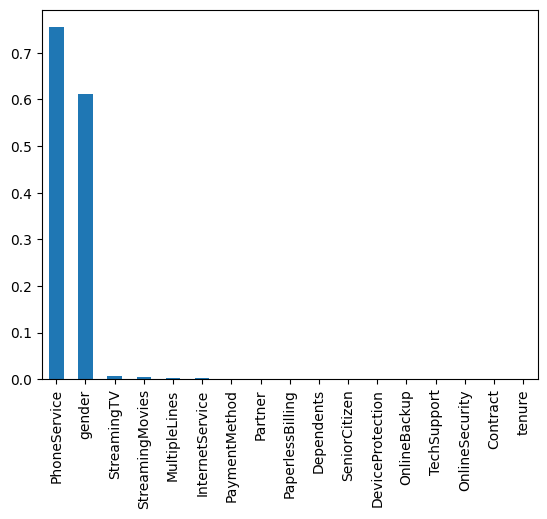

In [1]:
import numpy as numpy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
churn_df = pd.read_excel('Telco-Customer-Churn.xlsx')
churn_df.head()
print(churn_df)
churn_df.info()
label_encoder = LabelEncoder()
churn_df['gender'] = label_encoder.fit_transform(churn_df['gender'])
churn_df['Partner'] = label_encoder.fit_transform(churn_df['Partner'])
churn_df['Dependents'] = label_encoder.fit_transform(churn_df['Dependents'])
churn_df['PhoneService'] = label_encoder.fit_transform(churn_df['PhoneService'])
churn_df['MultipleLines'] = label_encoder.fit_transform(churn_df['MultipleLines'])
churn_df['InternetService'] = label_encoder.fit_transform(churn_df['InternetService'])
churn_df['OnlineSecurity'] = label_encoder.fit_transform(churn_df['OnlineSecurity'])
churn_df['OnlineBackup'] = label_encoder.fit_transform(churn_df['OnlineBackup'])
churn_df['DeviceProtection'] = label_encoder.fit_transform(churn_df['DeviceProtection'])
churn_df['TechSupport'] = label_encoder.fit_transform(churn_df['TechSupport'])
churn_df['StreamingTV'] = label_encoder.fit_transform(churn_df['StreamingTV'])
churn_df['StreamingMovies'] = label_encoder.fit_transform(churn_df['StreamingMovies'])
churn_df['Contract'] = label_encoder.fit_transform(churn_df['Contract'])
churn_df['PaperlessBilling'] = label_encoder.fit_transform(churn_df['PaperlessBilling'])
churn_df['PaymentMethod'] = label_encoder.fit_transform(churn_df['PaymentMethod'])
churn_df['Churn'] = label_encoder.fit_transform(churn_df['Churn'])

churn_df.head()

del churn_df['customerID']
del churn_df['TotalCharges']
del churn_df['MonthlyCharges']
print(churn_df.dtypes)
churn_df.head()

x = churn_df.drop('Churn', axis=1)

y = churn_df['Churn']

chi_scores = chi2(x,y)
chi_scores

p_values = pd.Series(chi_scores[1], index = x.columns)
p_values.sort_values(ascending=False , inplace= True)
p_values.plot.bar()